In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def histogram_equalization(image, nbr_bins=256):
    #Dam bao hinh anh dau vao la anh xam
    if image.mode != 'L':
        image = image.convert('L')
        
    #Chuyen doi hinh anh thanh mang numpy
    image_array = np.array(image)

    #Tinh toan histogram cua anh
    histogram, bins = np.histogram(image_array, bins=nbr_bins, range=(0,255), density=True)

    #Tinh toan ham phan phoi tich luy (CDF - Cumulative Distribution Function)
    cdf = histogram.cumsum()
    cdf = 255*cdf/cdf[-1]

    #lay gia tri tren tung pixel dua tren CDF
    image_equalized = np.interp(image_array, bins[:-1], cdf)

    #Chuyen doi mang ket qua thanh hinh anh
    equalized_image = Image.fromarray(image_equalized.astype('uint8'))

    return equalized_image

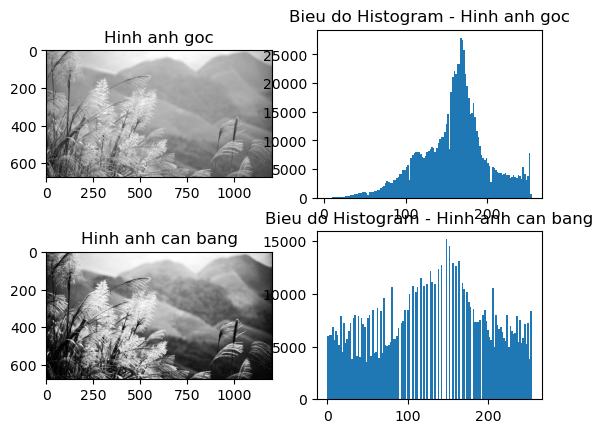

In [4]:
my_path = 'C:/Users/ADMIN/Desktop/WorkSpace/Anh/02.jpg'

#Goi anh
im=Image.open(my_path)

#Ap dung can bang luoc do anh xam
equalized_image = histogram_equalization(im)

#Tao 1 luoi 2x2 de hien thi hinh anh va bieu do
plt.subplot(2, 2, 1)
plt.imshow(im.convert("L"), cmap='gray')
plt.title('Hinh anh goc')

#Ve bieu do histogram cua hinh anh goc
plt.subplot(2, 2, 2)
plt.hist(np.array(im.convert("L")).flatten(), bins=128)
plt.title('Bieu do Histogram - Hinh anh goc')

#Hien thi hinh anh can bang
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Hinh anh can bang')

#Ve bieu do histogram cua hinh anh can bang
plt.subplot(2, 2, 4)
plt.hist(np.array(equalized_image).flatten(), bins=128)
plt.title('Bieu do Histogram - Hinh anh can bang')

plt.show()